In [1]:
# Activation Functions- ReLU, tanh, sigmoid, softmax
# processed images!

import tensorflow as tf
from tensorflow import keras
import numpy as np 

In [4]:
dataset = tf.keras.datasets.fashion_mnist
# open as dictionary-> dataset.__dict__
dir(dataset)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [5]:
mydata = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
len(mydata[0])

2

In [11]:
traindata, testdata = mydata

In [43]:
trainx = traindata[0]
trainy = traindata[1]
testx = testdata[0]
testy = testdata[1]

In [13]:
trainy[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [22]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]
classes = {count:labelName for count,labelName in enumerate(labelNames) }
class_to_num =  {labelName:count for count,labelName in enumerate(labelNames) }
classes

{0: 'top',
 1: 'trouser',
 2: 'pullover',
 3: 'dress',
 4: 'coat',
 5: 'sandal',
 6: 'shirt',
 7: 'sneaker',
 8: 'bag',
 9: 'ankle boot'}

In [25]:
class_to_num['dress']

3

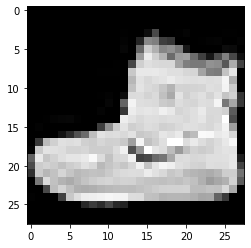

ankle boot


In [31]:
trainx[0] # first image
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(trainx[0], cmap='gray') # matrix of image, plotted as 2-D graph
plt.show()
print(classes[trainy[0]])

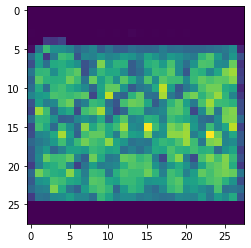

bag


In [30]:
plt.figure()
plt.imshow(trainx[23]) # matrix of image, plotted as 2-D graph
plt.show()
print(classes[trainy[23]])

In [39]:
# x and y-> 1 dimension of TENSORS!
# here-> 2-D

# Flattening-> converts 2-D inputs into 1-D tensors!
# this is the input layer for any image!
trainx[0].shape

(28, 28)

In [50]:
layer1 = keras.layers.Flatten(input_shape=(28,28))
layer2 = keras.layers.Dense(64)
layer3 = keras.layers.Dense(10)
model = keras.models.Sequential([layer1, layer2, layer3])

In [54]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=['accuracy'])
# example-> population on y, age group distribution on x
# normalized the data over log-> then x distributions are now called logits

In [44]:
#MinMax-> x-min / max-min
# in colors-> min=0, max=255=> minmax = (color-0)/(255-0)
# min-max => colors/255!
trainx = trainx/255
testx = testx/255

In [55]:
trainx[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [57]:
model.fit(trainx, trainy, epochs=50, verbose=0)

In [58]:
predicted = model.predict(testx)

In [49]:
predicted[0].shape
# flattening proof? 
# (28X28) => single list containing 784


(784,)

In [61]:
predicted[0]

array([ -5.1715264, -13.21765  ,  -2.8476455,  -4.467734 ,  -4.32139  ,
         9.405628 ,  -1.8369324,  11.330631 ,   4.0016813,  13.293289 ],
      dtype=float32)

In [62]:
np.argmax(predicted[0]) # index of largest element

9

In [65]:
# printing first 5 mistakes
counter = 5
for i, result in enumerate(predicted):
  ans = np.argmax(result)
  if ans != testy[i]:
    print('At index : ' + str(i+1))
    print('wrong prediction')
    print(classes[ans] + ' was the prediction')
    print(' but reality was  '+  classes[testy[i]])
    print('*****')
    counter = counter - 1
    if counter == 0:
      break

At index : 18
wrong prediction
pullover was the prediction
 but reality was  coat
*****
At index : 22
wrong prediction
sneaker was the prediction
 but reality was  sandal
*****
At index : 24
wrong prediction
sneaker was the prediction
 but reality was  ankle boot
*****
At index : 26
wrong prediction
pullover was the prediction
 but reality was  coat
*****
At index : 28
wrong prediction
dress was the prediction
 but reality was  top
*****


In [68]:
performance = model.evaluate(testx, testy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4815 - accuracy: 0.8336


In [67]:
performance # for training
# (loss, metrics) (categorical_cross_entropy, accuracy)

[0.3679716885089874, 0.8680499792098999]

In [69]:
performance # for testing

[0.4815012216567993, 0.8335999846458435]